In [1]:
import sys
import os
# Set path to parent directory of the current notebook file
sys.path.append(os.path.abspath(".."))

In [2]:
from environment.env_fatory import make_env
from config.configHandler import load_config
from BETDQNet.BETDQNet import run_BETDQNet
from BETDQNet.VanillaDQN import run_VanillaDQN
from visualization.visualization_handler import plot_reward_over_episodes

In [3]:
hyper_params = {
    "batch_size": 64,
    "gamma": 0.99,
    "discount_factor": 0.99,
    "learning_rate": 0.001,
    "memory_size": 10_000,
    "epsilon_start": 1.0,
    "epsilon_end": 0.1,
    "epsilon_decay_period": 5_000,
    "train_start": 1_000,
    "w1": 0.2,
    "w2": 0.8,
    "zeta": 2.2
}
results = {}

In [4]:
cfg = load_config()  # Make sure config.yaml is accessible
envs_cfg = cfg.get("environments", {})
if not envs_cfg:
    raise ValueError("No 'environments' section found in your config.")

In [5]:
def run_game(env_cfg):
    env_name = env_cfg["env_name"]
    print(f"Running environment: {env_name}")
    hyper_params["episodes"] = env_cfg.pop("episodes")
    
    env = make_env(env_cfg, env_name)
    betdqnet_rewards = run_BETDQNet(env, hyper_params, env_cfg)
    env = make_env(env_cfg, env_name)
    vanilla_rewards = run_VanillaDQN(env, hyper_params, env_cfg)
    
    return {
        "BETDQNet": betdqnet_rewards,
        "VanillaDQN": vanilla_rewards
    }

# CartPole Experiment

In [6]:
game_id = "cartpole"
results[game_id] = run_game(envs_cfg[game_id])

Running environment: CartPole-v1
Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Ep: 10, Avg.: 19.2
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Ep: 20, Avg.: 25.1
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Ep: 30, Avg.: 16.4
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Ep: 40, Avg.: 22.0
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Ep: 50, Avg.: 25.6
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Ep: 60, Avg.: 23.5
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Ep: 70, Avg

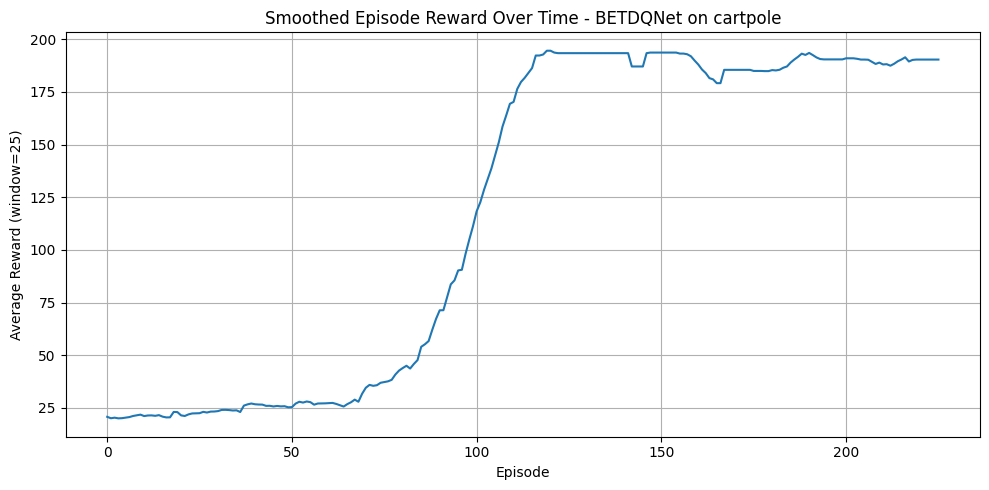

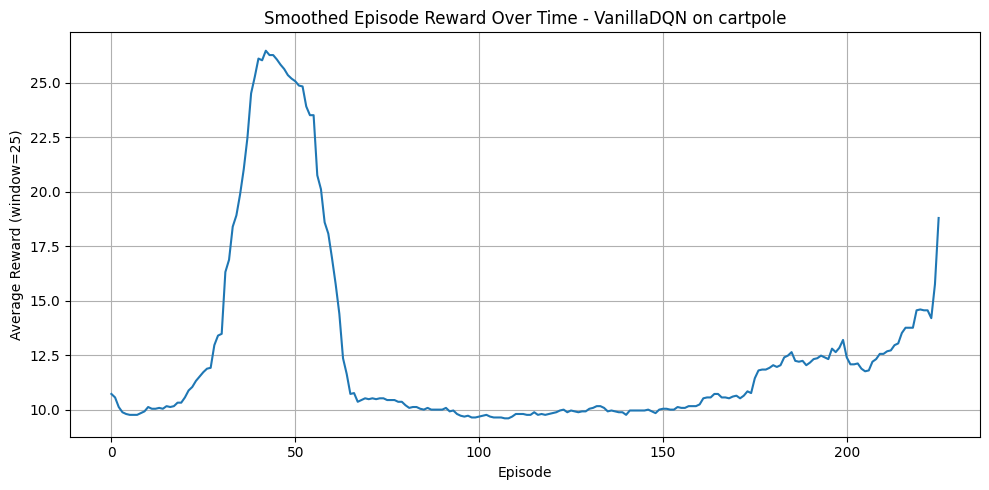

In [16]:
window = 25
plot_reward_over_episodes(results[game_id]["BETDQNet"], f"BETDQNet on {game_id}", window)
plot_reward_over_episodes(results[game_id]["VanillaDQN"], f"VanillaDQN on {game_id}", window)

In [21]:
import matplotlib.pyplot as plt
from src.visualization.visualization_handler import moving_average

def plot_side_by_side(game_id, aper_rewards, vanilla_rewards, window):
    plt.figure(figsize=(12, 6))
    plt.title(f'Game {game_id}')

    # Plot raw episode rewards (optional, can be commented for less clutter)
    plt.plot(aper_rewards, alpha=0.2, label="BETDQNet (raw)")
    plt.plot(aper_rewards, alpha=0.2, label="VanillaDQN (raw)")

    # Plot moving averages for both curves
    plt.plot(moving_average(aper_rewards, window), label="BETDQNet (smoothed)")
    plt.plot(moving_average(vanilla_rewards, window), label="VanillaDQN (smoothed)")

    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("Episode Reward Comparison: BETDQNet vs VanillaDQN")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

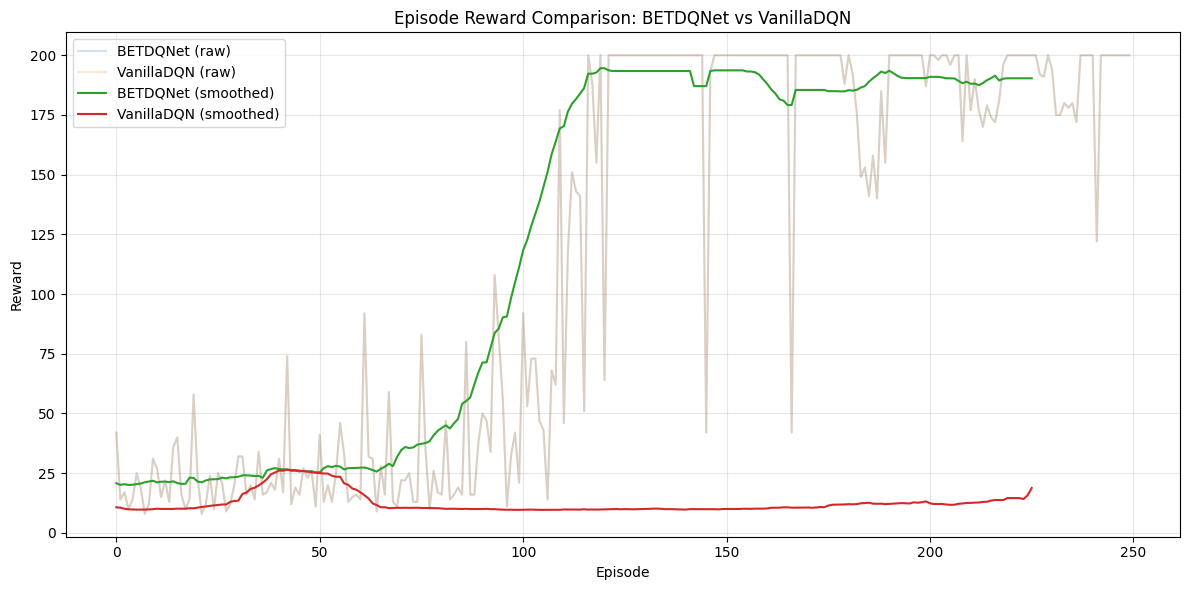

In [22]:
plot_side_by_side(game_id, results[game_id]["BETDQNet"], results[game_id]["VanillaDQN"], window=25)

# Acrobot Experiment

In [23]:
game_id = "acrobot"
results[game_id] = run_game(envs_cfg[game_id])

Running environment: Acrobot-v1
Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Ep: 10, Avg.: -200.0
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Ep: 20, Avg.: -199.6
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Ep: 30, Avg.: -189.8
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Ep: 40, Avg.: -153.7
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Ep: 50, Avg.: -166.6
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Ep: 60, Avg.: -113.4
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70


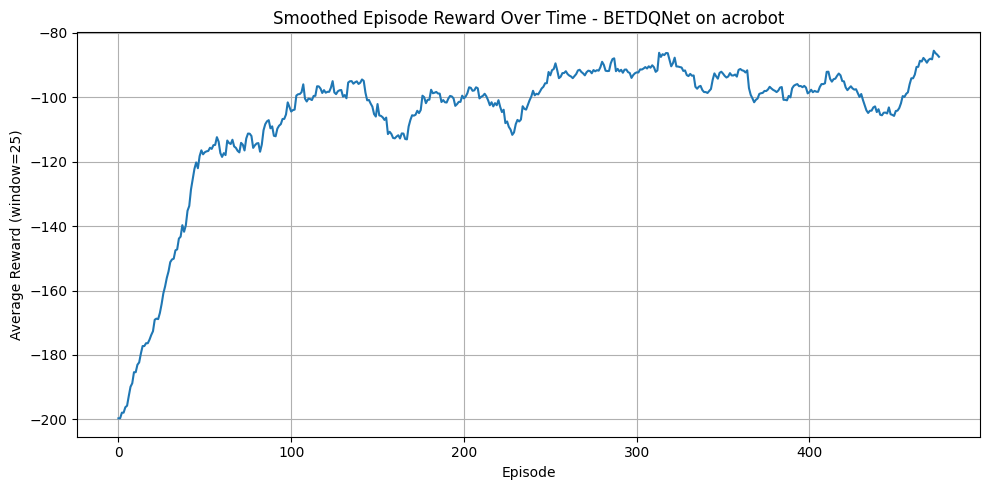

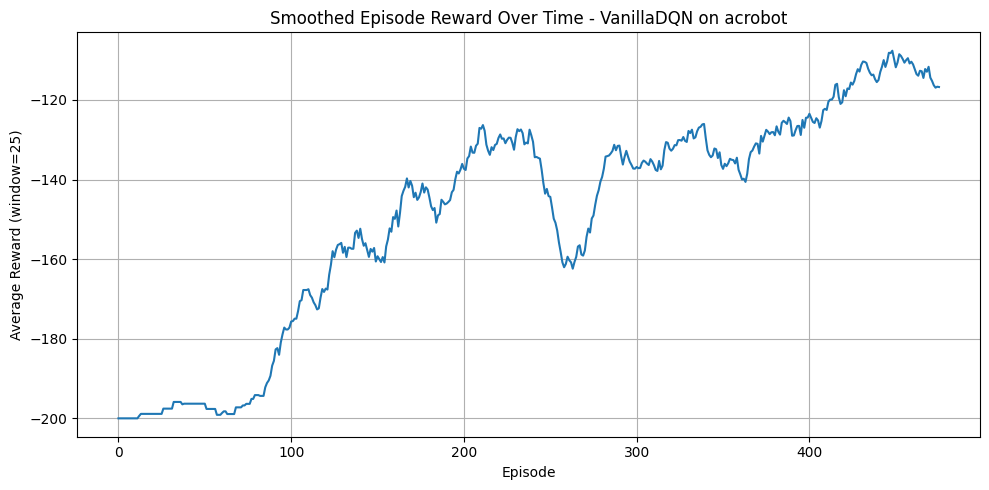

In [24]:
window = 25
plot_reward_over_episodes(results[game_id]["BETDQNet"], f"BETDQNet on {game_id}", window)
plot_reward_over_episodes(results[game_id]["VanillaDQN"], f"VanillaDQN on {game_id}", window)

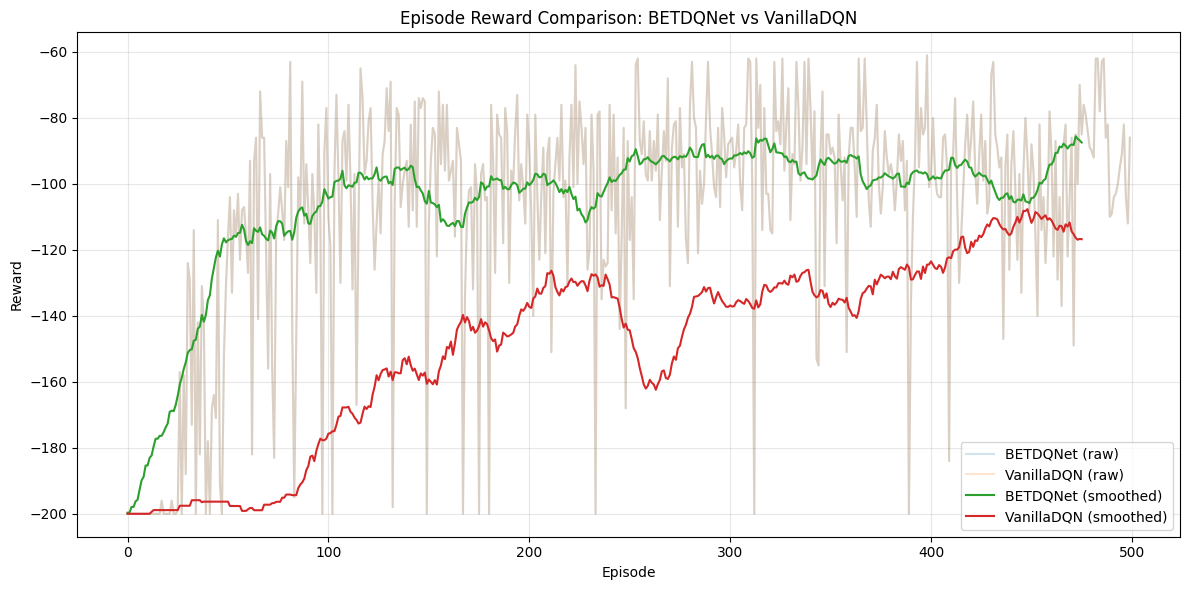

In [25]:
plot_side_by_side(game_id, results[game_id]["BETDQNet"], results[game_id]["VanillaDQN"], window=25)